bootstraping

In [ ]:
import numpy as np

def bootstrap(data, n=1000, func=np.mean):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = list()
    sample_size = len(data)
    xbar_init = np.mean(data)
    for c in range(n):
        itersample = np.random.choice(data, size=sample_size, replace=True)
        simulations.append(func(itersample))
    simulations.sort()
    def ci(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_indx = int(np.floor(n*l_pval))
        u_indx = int(np.floor(n*u_pval))
        return(simulations[l_indx],simulations[u_indx])
    return(ci)

In [ ]:
 v = [10.3, 10.6, 11.7, 14.0, 14.2, 15.0, 16.8, 18.2, 21.3, 21.0]
 boot = bootstrap(v, n=5000)
 cintervals = [boot(i) for i in (.90, .95, .99, .995)]
 print(cintervals)

[(13.37, 17.35), (13.029999999999998, 17.68), (12.44, 18.39), (12.28, 18.619999999999997)]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

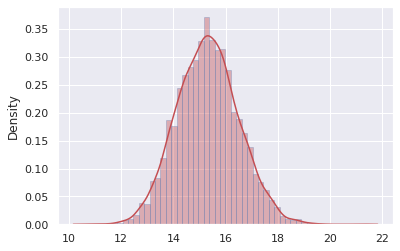

In [ ]:

import numpy as np
import matplotlib
import seaborn as sns
sns.set(style="darkgrid")

v = [10.3, 10.6, 11.7, 14.0, 14.2, 15.0, 16.8, 18.2, 21.3, 21.0]
xbar_init = np.round(np.mean(v), 2)

# generate 5000 resampled sample means  =>
means = [np.mean(np.random.choice(v,size=len(v),replace=True)) for i in range(5000)]
sns.distplot(means, color='r', kde=True, hist_kws=dict(edgecolor="b", linewidth=.675))
plt.xlabel("Initial Sample Mean: {}".format(xbar_init))
plt.title("Distribution of Sample Mean")
plt.axvline(x=xbar_init) # vertical line at xbar_init
plt.show()